In [1]:
import numpy as np
import matplotlib.pyplot as plt

En este código se intentará replicar los resultados de los artículos J. G. OBrien et al, 2018 y X. Lin et al, 2017 para los cuales las velocidades circulares mondianas para Simple y Standard son las siguientes:

$V_{M} = \frac{V_N}{2} \sqrt{1 + \sqrt{1 + \frac{4a_0 R}{V^2_N}}}$  y $V_M = \sqrt{ \sqrt{ \frac{V^4_N}{2} + \sqrt{ \frac{V^8_N}{4} + R^2 a^2_0 V^4_N }} }$ respectivamente.

Para R.A.R. Tomamos la función te interpolación de V.Marra et al, 2020. De donde se obtiene que la velocidad circular mondiana es:

$V_M = \frac{V_N}{\sqrt{ 1 - e^{-\sqrt{ \frac{V^2_N}{Ra_0} }} }}$.

Acá tendremos las tres componentes de la galaxia: bulbo, disco, halo. Para el bulbo y el halo usaremos el perfil de Hernquist y para el disco el perfil del disco exponencial.

In [2]:
## Creamos el vector r [1 kpc], desde 0 hasta 50 con paso de 0.01

r = np.arange(0.001, 50.1, 0.01)  ## Unidad de referencia de longitud 1kpc

## Definamos las constantes

G = 430007.1  ## Unidad de referencia de tiempo 1.1Gyr

a_0 = 4679.4 ## [kpc/Gyr^2]

In [3]:
## Definimos las funciones de la velocidad circular del disco y del bulbo 

from scipy.special import i0, i1, k0, k1

def V_Halo(M_h, b_h, r):
    vel_cir_halo_cuadrado = (r*G*M_h)/((r+b_h)*(r+b_h))
    V_Halo = np.sqrt(vel_cir_halo_cuadrado)
    return V_Halo

def V_Disco(M_d, r):
    R_d = 1.6
    Sigma_0 = M_d/(2*np.pi*R_d*R_d)
    y = r/(2.0*R_d)
    vel_cir_disco_cuadrado = ((0.5*np.pi*G*Sigma_0*r*r)/R_d)*(i0(y)*k0(y) - i1(y)*k1(y))
    V_Disco = np.sqrt(vel_cir_disco_cuadrado)
    return V_Disco

def V_Bulbo(M_b, r):
    b = 0.4
    vel_cir_bulbo_cuadrado = (r*G*M_b)/((r+b)*(r+b))
    V_Bulbo = np.sqrt(vel_cir_bulbo_cuadrado)
    return V_Bulbo

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
## Definimos las velocidades circulares mondianas para R.A.R., Simple y Standard

def V_RAR(M_h, b_h, M_b, M_d, r):
    V_N = np.sqrt(V_Bulbo(M_b, r)*V_Bulbo(M_b, r) + V_Disco(M_d, r)*V_Disco(M_d, r) +
                 V_Halo(M_h, b_h, r)*V_Halo(M_h, b_h, r))
    V_RAR = V_N / (np.sqrt(1.0 - np.exp(-np.sqrt(V_N*V_N / ( r * a_0 )))))
    return V_RAR

def V_Simple(M_h, b_h, M_b, M_d, r):
    V_N = np.sqrt(V_Bulbo(M_b, r)*V_Bulbo(M_b, r) + V_Disco(M_d, r)*V_Disco(M_d, r) +
                 V_Halo(M_h, b_h, r)*V_Halo(M_h, b_h, r))
    V_Simple = (V_N / np.sqrt(2.0)) * np.sqrt(1.0 + 4.0*a_0*r / (V_N*V_N))
    return V_Simple

def V_Standard(M_h, b_h, M_b, M_d, r):
    V_N = np.sqrt(V_Bulbo(M_b, r)*V_Bulbo(M_b, r) + V_Disco(M_d, r)*V_Disco(M_d, r) +
                 V_Halo(M_h, b_h, r)*V_Halo(M_h, b_h, r))
    V_N_4 = V_N * V_N * V_N * V_N
    V_Standard_cuadrado = np.sqrt(V_N_4 / 2.0 + np.sqrt(V_N_4*V_N_4/4.0 + r*r*a_0*a_0*V_N_4))
    V_Standard = np.sqrt(V_Standard_cuadrado)
    return V_Standard

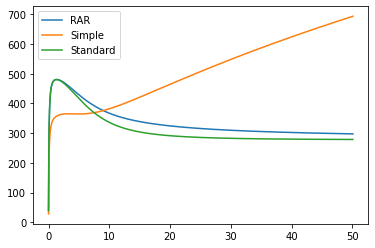

In [5]:
plt.plot(r, V_RAR(2.0, 2.0, 0.5, 1.0, r), label='RAR')
plt.plot(r, V_Simple(2.0, 2.0, 0.5, 1.0, r), label='Simple')
plt.plot(r, V_Standard(2.0, 2.0, 0.5, 1.0, r), label='Standard')
plt.legend()

In [6]:
## Galaxia real

import pandas as pd

datos = pd.read_csv('Datos_NGC2403_CurvaRotacion', sep='   ')

/tmp/ipykernel_18685/2401265028.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/tmp/ipykernel_18685/2401265028.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datos = pd.read_csv('Datos_NGC2403_CurvaRotacion', sep='   ')


In [7]:
datos.head()

,R(kpc),V(km/s)
0,0.05,53.95123
1,0.10,60.44677
2,0.15,66.02752
3,0.20,69.54928
4,0.25,71.69053


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   R(kpc)   394 non-null    float64
 1   V(km/s)  394 non-null    float64
dtypes: float64(2)
memory usage: 6.3 KB


In [9]:
x = np.array(datos['R(kpc)'])
y = np.array(datos['V(km/s)'])

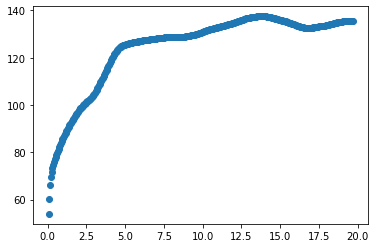

In [10]:
plt.scatter(x, y)

Ahora vamos a probar las velocidades circulares mondianas con una galaxia real, de la cual sabemos, según X. Kang et al, 2023, que $R_d = 1.6 Kpc$ y la masa estelar $M_{estelar} = 5.01 x 10^9 M_{solares}$.

In [11]:
from scipy.optimize import curve_fit

Error M_h: 45.89105138672052 
Error R_h: 160141.21690128936 
Error M_b: 509267.42097231385 
Error M_d: 4.306240046468063
M_h= 38.93136199300158 
R_h= 0.0010000000002198103 
M_b= 0.1000000000000309 
M_d= 2.1173585800529686


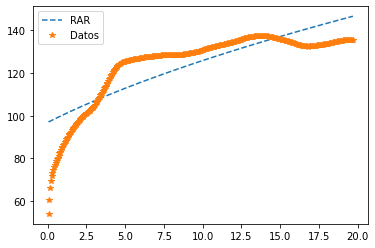

In [12]:
## R.A.R.

## Recordemos: V_RAR(M_b, b, M_d, R_d, r)

p_inicial = (0.5, 0.5, 1.0, 1.0)

limite_inferior = [0.001, 0.001, 0.1, 1]
limite_superior = [100.0, 100.0, 10.0, 10.0]

params_RAR, cov_RAR = curve_fit(V_RAR, x, y, method='trf', p0=p_inicial, bounds=(limite_inferior, limite_superior))


error_RAR = np.sqrt(np.diag(cov_RAR))

print('Error M_h:', error_RAR[0], '\nError R_h:', error_RAR[1], '\nError M_b:', error_RAR[2], 
      '\nError M_d:', error_RAR[3])


print('M_h=', params_RAR[0], '\nR_h=', params_RAR[1], '\nM_b=', params_RAR[2], '\nM_d=', params_RAR[3])

y_pred_RAR = V_RAR(x, params_RAR[0], params_RAR[1], params_RAR[2], params_RAR[3])


plt.plot(x, y_pred_RAR, '--', label='RAR')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_h: 3574048.5356128663 
Error R_h: 52411.65349942224 
Error M_b: 540673.4517903271 
Error M_d: 391849.03902559134
M_h= 19.24196672365002 
R_h= 0.0010000000008343953 
M_b= 0.10000000000175956 
M_d= 1.0000000000010854


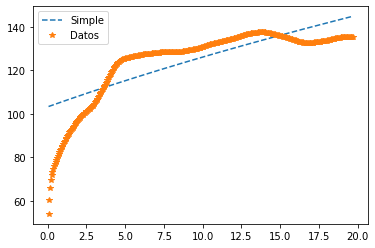

In [13]:
## Simple

## Recordemos: V_Simple(M_b, b, M_d, R_d, r)

p_inicial = (0.5, 0.5, 1.0, 1.0)

limite_inferior = [0.001, 0.001, 0.1, 1]
limite_superior = [100.0, 100.0, 10.0, 10.0]

params_Simple, cov_Simple = curve_fit(V_Simple, x, y, method='trf', p0=p_inicial, 
                                      bounds=(limite_inferior, limite_superior))


error_Simple = np.sqrt(np.diag(cov_Simple))

print('Error M_h:', error_Simple[0], '\nError R_h:', error_Simple[1], '\nError M_b:', error_Simple[2], 
      '\nError M_d:', error_Simple[3])


print('M_h=', params_Simple[0], '\nR_h=', params_Simple[1], '\nM_b=', params_Simple[2], '\nM_d=', params_Simple[3])

y_pred_Simple = V_Simple(x, params_Simple[0], params_Simple[1], params_Simple[2], params_Simple[3])


plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y, '*', label='Datos')
plt.legend()

Error M_h: 16.85547065157431 
Error R_h: 321756.0546499545 
Error M_b: 659868.3003044646 
Error M_d: 2.389806254149245
M_h= 43.8165753961048 
R_h= 0.0010000000000000293 
M_b= 0.10000000000000002 
M_d= 3.195492816526969


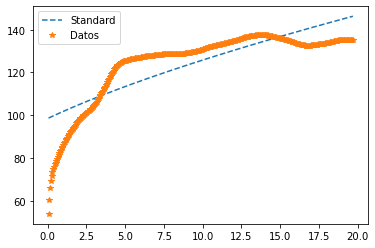

In [14]:
## Standard

## Recordemos: V_Standard(M_b, b, M_d, R_d, r)

p_inicial = (1.5, 1.5, 0.5, 1.0)

limite_inferior = [0.001, 0.001, 0.1, 1]
limite_superior = [100.0, 100.0, 10.0, 10.0]

params_Standard, cov_Standard = curve_fit(V_Standard, x, y, method='trf', p0=p_inicial, 
                                      bounds=(limite_inferior, limite_superior))


error_Standard = np.sqrt(np.diag(cov_Standard))

print('Error M_h:', error_Standard[0], '\nError R_h:', error_Standard[1], '\nError M_b:', error_Standard[2], 
      '\nError M_d:', error_Standard[3])


print('M_h=', params_Standard[0], '\nR_h=', params_Standard[1], '\nM_b=', params_Standard[2], 
      '\nM_d=', params_Standard[3])

y_pred_Standard = V_Standard(x, params_Standard[0], params_Standard[1], params_Standard[2], params_Standard[3])


plt.plot(x, y_pred_Standard, '--', label='Standard')
plt.plot(x, y, '*', label='Datos')
plt.legend()

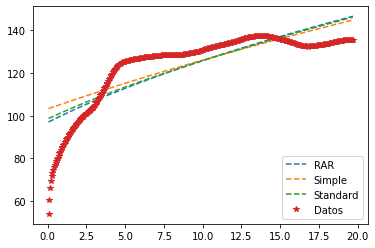

In [15]:
plt.plot(x, y_pred_RAR, '--', label='RAR')
plt.plot(x, y_pred_Simple, '--', label='Simple')
plt.plot(x, y_pred_Standard, '--', label='Standard')
plt.plot(x, y, '*', label='Datos')
plt.legend()

In [39]:
## Veamos con Iminuit
from iminuit import Minuit

# Definir la función de error (chi-cuadrado) a minimizar
def chi2(M_h, R_h, M_b, M_d):
    return sum((y - V_RAR(x, M_h, R_h, M_b, M_d))**2)

# Crear una instancia de Minuit y minimizar el chi-cuadrado
minuit_chi2 = Minuit(chi2,
                M_h=10, R_h=1, M_b=10, M_d=2)

minuit_chi2.limits['M_h'] = (0.1,10)
minuit_chi2.limits['R_h'] = (0.1,10)
minuit_chi2.limits['M_b'] = (0.1,10)
minuit_chi2.limits['M_d'] = (0.1,10)

In [40]:
minuit_chi2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.35e+05                   │              Nfcn = 268              │
│ EDM = 5.15e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ M_h  │ 10.000000 │ 0.000024  │            │            │   0.1   │   10    │       │
│ 1 │ R_h  │100.0000e-3│ 0.0001e-3 │            │            │   0.1   │   10    │       │
│ 2 │ M_b  │100.000e-3 │ 0.021e-3  │            │            │   0.1   │   10    │       │
│ 3 │ M_d  │100.00000e-3│0.00012e-3 │            │            │   0.1   │   10    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────┐
│     │      M_h      R_h      M_b      M_d │
├─────┼─────────────────────────────────────┤
│ M_h │ 6.89e-16        0       -0       -0 │
│ R_h │        0 9.37e-19        0        0 │
│ M_b │       -0        0  2.5e-14       -0 │
│ M_d │       -0        0       -0 6.93e-19 │
└─────┴─────────────────────────────────────┘

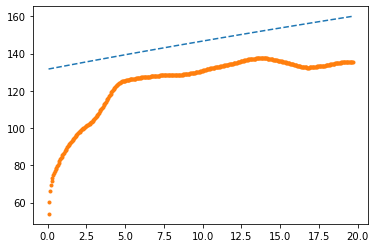

In [41]:
y_pred_Iminuit = V_RAR(x, 10, 0.1, 0.1, 0.1)

plt.plot(x, y_pred_Iminuit, '--')
plt.plot(x, y, '.')